In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path

import re
from utils_notebook import histogram_experiment, dataframe_to_latex

In [2]:
results_path = "../results/grid_search_new_db"
full_results_df = pd.DataFrame()

In [43]:
# For all folder in results_path
args_max = []
for j, experiment_folder in enumerate(os.listdir(results_path)):
    # Load the data
    # if experiment starts with DDPM skip
    if experiment_folder.startswith("DDPM"):
        continue
    for i, dataset_folder in enumerate(os.listdir(os.path.join(results_path, experiment_folder))):
        if "synthetic" not in dataset_folder or "cosine" in experiment_folder:
            continue
        nb_bins = int(re.search(r"bins(\d+)", experiment_folder).group(1))
        T = int(re.search(r"T(\d+)", experiment_folder).group(1))
        if T != 400 or nb_bins != 7:
            continue
        arg_max = np.load(os.path.join(results_path, experiment_folder, dataset_folder, "arg_max.npy"))

        arg = (arg_max * 10 ).tolist()
        for a in arg:
            args_max.extend(a)



In [44]:
len(args_max)

12475280

In [45]:
args_max[0]


290

In [46]:
print(type(args_max))
# sample 10 000 args_max
args_max = np.array(args_max)
args_max = args_max[np.random.choice(args_max.shape[0], 10000, replace=False)]
args_max.shape


<class 'list'>


(10000,)

In [55]:
np.unique(args_max, return_counts=True)

(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390]),
 array([1331,    9,    8,    7,    9,   23,   13,   10,   10,   23,   16,
          39,   44,   40,   47,   58,   80,   79,  105,  144,  160,  202,
         199,  238,  254,  303,  310,  343,  387,  391,  408,  458,  451,
         443,  511,  534,  575,  562,  564,  612]))

In [58]:
np.sum([args_max == 0])

1331

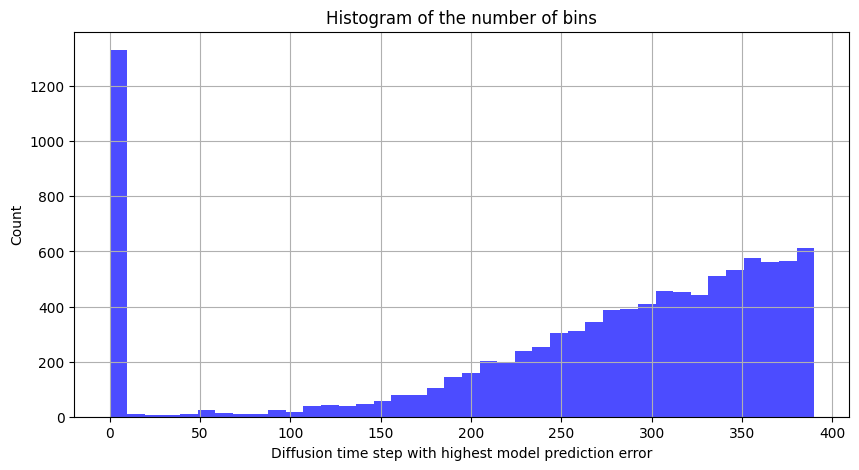

1[{"variableName": "ID_TO_MEANING", "type": "dictionary", "supportedEngines": ["pandas"], "isLocalVariable": true, "rawType": "builtins.dict"}, {"variableName": "NULL", "type": "unknown", "supportedEngines": ["pandas"], "isLocalVariable": true, "rawType": "_pydevd_bundle.pydevd_constants.Null"}]

1[{"variableName": "ID_TO_MEANING", "type": "dictionary", "supportedEngines": ["pandas"], "isLocalVariable": true, "rawType": "builtins.dict"}, {"variableName": "NULL", "type": "unknown", "supportedEngines": ["pandas"], "isLocalVariable": true, "rawType": "_pydevd_bundle.pydevd_constants.Null"}]

1[{"variableName": "ID_TO_MEANING", "type": "dictionary", "supportedEngines": ["pandas"], "isLocalVariable": true, "rawType": "builtins.dict"}, {"variableName": "NULL", "type": "unknown", "supportedEngines": ["pandas"], "isLocalVariable": true, "rawType": "_pydevd_bundle.pydevd_constants.Null"}]

1[{"variableName": "ID_TO_MEANING", "type": "dictionary", "supportedEngines": ["pandas"], "isLocalVariable

In [ ]:
# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(args_max, bins=40, color="blue", alpha=0.7)
plt.xlabel("Diffusion time step with highest model prediction error")
plt.ylabel("Count")
plt.title("Histogram of the number of bins")
plt.grid()
plt.show()


In [ ]:
full_results_df = full_results_df.drop(columns=["Unnamed: 0", "model_name", "sampling_method"], )
full_results_df.head()

,training_time,inference_time,f1_score,dataset_name,training_method,random_seed,aucroc,experiment,dataset_version,nb_bins,...,grad_ndcg,shap_explanation_accuracy,shap_feature_importance_ndcg,shap_explanation_time,mean_diffusion_accuracy,mean_diffusion_ndcg,mean_diffusion_time,max_diffusion_accuracy,max_diffusion_ndcg,max_diffusion_time
0,545.190490,0.180269,0.394000,A_synthetic_f4_s5000_c2_r0.05_0.05,unsupervised,0,0.744031,DTEC_unsupervised_None_s0_T100_bins7,4,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,545.905368,0.195822,0.844000,A_synthetic_f50_s5000_c12_r0.02_0.02_0.02_0.02...,unsupervised,0,0.991350,DTEC_unsupervised_None_s0_T100_bins7,5,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,523.769845,0.239424,0.545455,A_synthetic_f10_s5000_c4_r0.033_0.033_0.033,unsupervised,0,0.886083,DTEC_unsupervised_None_s0_T100_bins7,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,461.863078,0.161886,0.674000,A_synthetic_f1000_s5000_c40_r0.02_0.02_0.02_0....,unsupervised,0,0.872215,DTEC_unsupervised_None_s0_T100_bins7,3,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,520.101181,0.152035,0.556000,A_synthetic_f1000_s5000_c40_r0.02_0.02_0.02_0....,unsupervised,0,0.862560,DTEC_unsupervised_None_s0_T100_bins7,4,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for name in full_results_df.columns:
    print(name)

training_time
inference_time
f1_score
dataset_name
training_method
random_seed
aucroc
experiment
dataset_version
nb_bins
T
grad_explanation_accuracy
grad_explanation_time
grad_ndcg
shap_explanation_accuracy
shap_feature_importance_ndcg
shap_explanation_time
mean_diffusion_accuracy
mean_diffusion_ndcg
mean_diffusion_time
max_diffusion_accuracy
max_diffusion_ndcg
max_diffusion_time


In [ ]:
full_results_df['dimension'] = full_results_df['dataset_name'].str.extract(r"f(\d+)", expand=False).astype(int)
# RAtio are stored in the string as r{ratio1}_{ratio2}_..._{ratioN}
ratios = full_results_df['dataset_name'].str.extract(r'r([0-9]*\.?[0-9]+)|_([0-9]*\.?[0-9]+)')
# Remove empty ratio
# Combine the two capture groups and drop NaNs
ratios = ratios.apply(lambda x: x[0] if pd.notnull(x[0]) else x[1], axis=1).astype(float)

# Sum the ratios grouped by the dataset index
full_results_df['anomaly_ratio'] = ratios.groupby(level=0).sum()

In [ ]:
# Keep only row where nb_bins = 7 and T = 400
full_results_df = full_results_df[(full_results_df['nb_bins'] == 7) & (full_results_df['T'] == 400)]
full_results_df = full_results_df.drop(columns=["nb_bins", "T"])

In [ ]:
full_results_df["ndcg_diff_shap_mean"] = full_results_df['shap_feature_importance_ndcg'] - full_results_df['mean_diffusion_ndcg']
full_results_df["ndcg_diff_grad_mean"] = full_results_df['grad_ndcg'] - full_results_df['mean_diffusion_ndcg']
full_results_df['accuracy_diff_shap_mean'] = full_results_df['shap_explanation_accuracy'] - full_results_df['mean_diffusion_accuracy']
full_results_df['accuracy_diff_grad_mean'] = full_results_df['grad_explanation_accuracy'] - full_results_df['mean_diffusion_accuracy']
full_results_df['ndcg_diff_shap_grad'] = full_results_df['shap_feature_importance_ndcg'] - full_results_df['grad_ndcg']
full_results_df['accuracy_diff_shap_grad'] = full_results_df['shap_explanation_accuracy'] - full_results_df['grad_explanation_accuracy']

full_results_df['ndcg_diff_mean_max']= full_results_df['mean_diffusion_ndcg'] - full_results_df['max_diffusion_ndcg']
full_results_df['accuracy_diff_mean_max']= full_results_df['mean_diffusion_accuracy'] - full_results_df['max_diffusion_accuracy']

In [ ]:
# Compute mean and std for each dataset with different version, but same experiment name
temp_df = full_results_df.drop(columns=['training_method', "dataset_version"])
temp_df['anomaly_ratio']
mean_df = temp_df.groupby(["experiment", "dataset_name"]).mean().reset_index()
std_df = temp_df.groupby(["experiment", "dataset_name"]).std().reset_index()

In [ ]:
print(full_results_df['experiment'].unique())
print(full_results_df['dataset_name'].unique())

['DTEC_DSIL_deterministic_0.5_s0_T400_bins7'
 'DTEC_unsupervised_None_s0_T400_bins7']
['A_synthetic_f4_s5000_c2_r0.05_0.05'
 'A_synthetic_f50_s5000_c12_r0.02_0.02_0.02_0.02_0.02'
 'A_synthetic_f10_s5000_c4_r0.033_0.033_0.033'
 'A_synthetic_f1000_s5000_c40_r0.02_0.02_0.02_0.02_0.02'
 'A_synthetic_f1000_s5000_c40_r0.01_0.01_0.01_0.01_0.01'
 'A_synthetic_f10_s5000_c4_r0.0166_0.0166_0.0166'
 'A_synthetic_f100_s5000_c40_r0.02_0.02_0.02_0.02_0.02'
 'A_synthetic_f4_s5000_c2_r0.025_0.025'
 'A_synthetic_f50_s5000_c12_r0.01_0.01_0.01_0.01_0.01'
 'A_synthetic_f1000_s5000_c12_r0.01_0.01_0.01_0.01_0.01'
 'A_synthetic_f100_s5000_c40_r0.01_0.01_0.01_0.01_0.01']


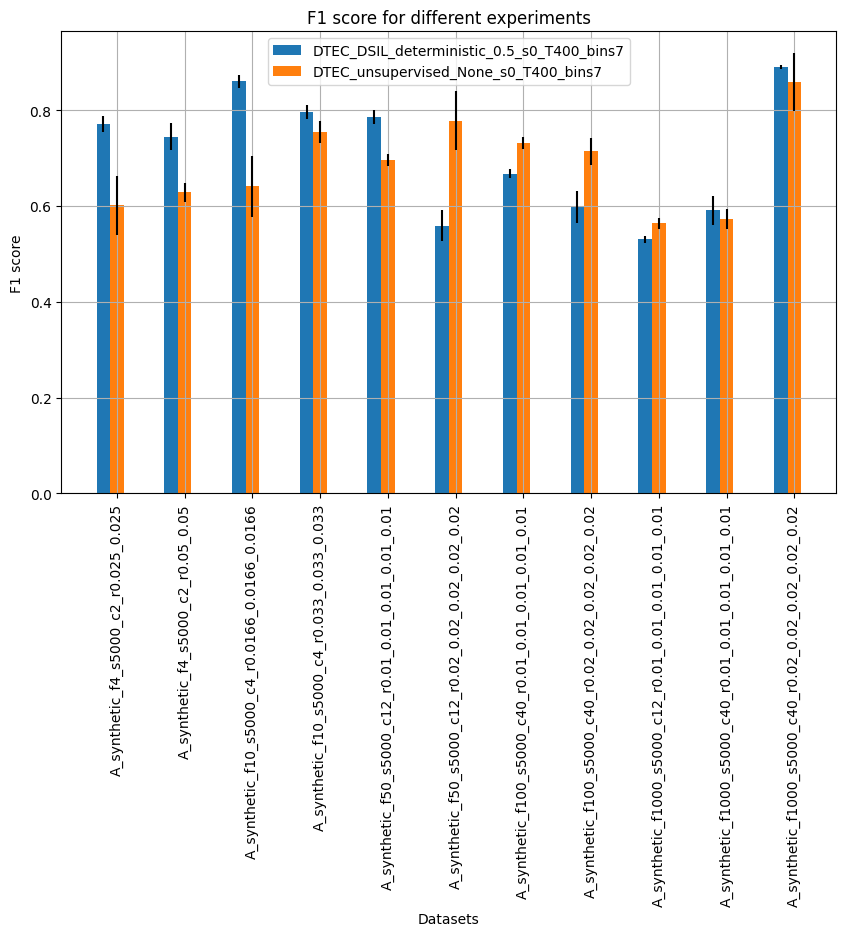

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="f1_score", ylabel="F1 score", title="F1 score for different experiments")

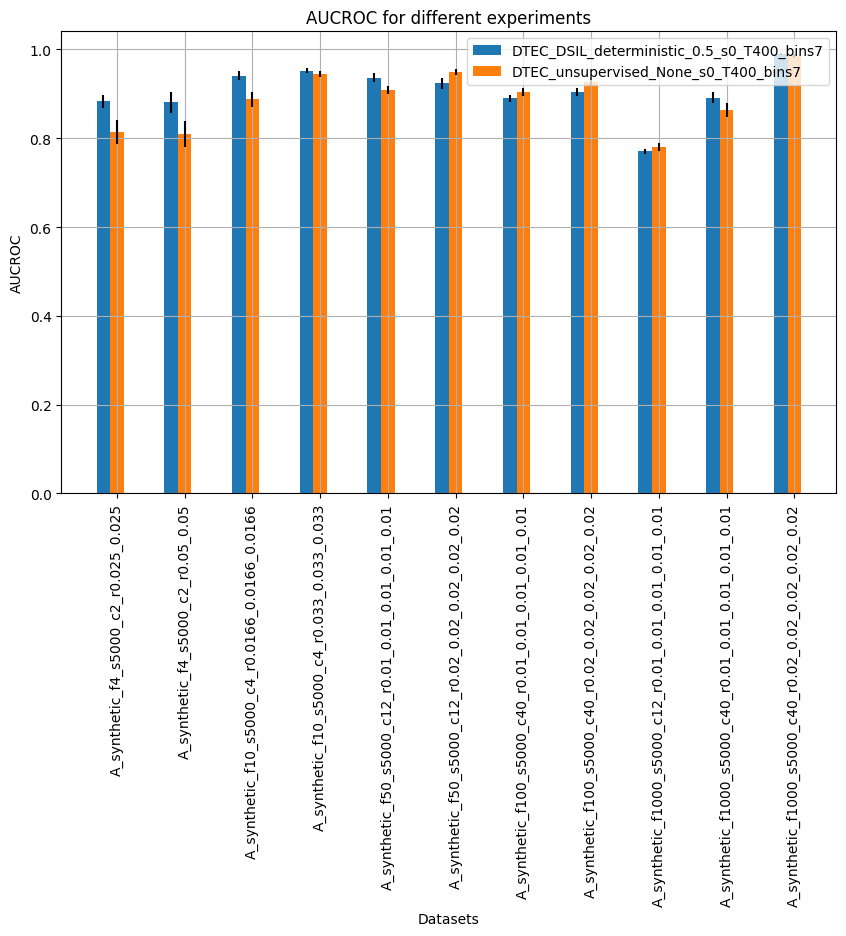

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="aucroc", ylabel="AUCROC", title="AUCROC for different experiments")

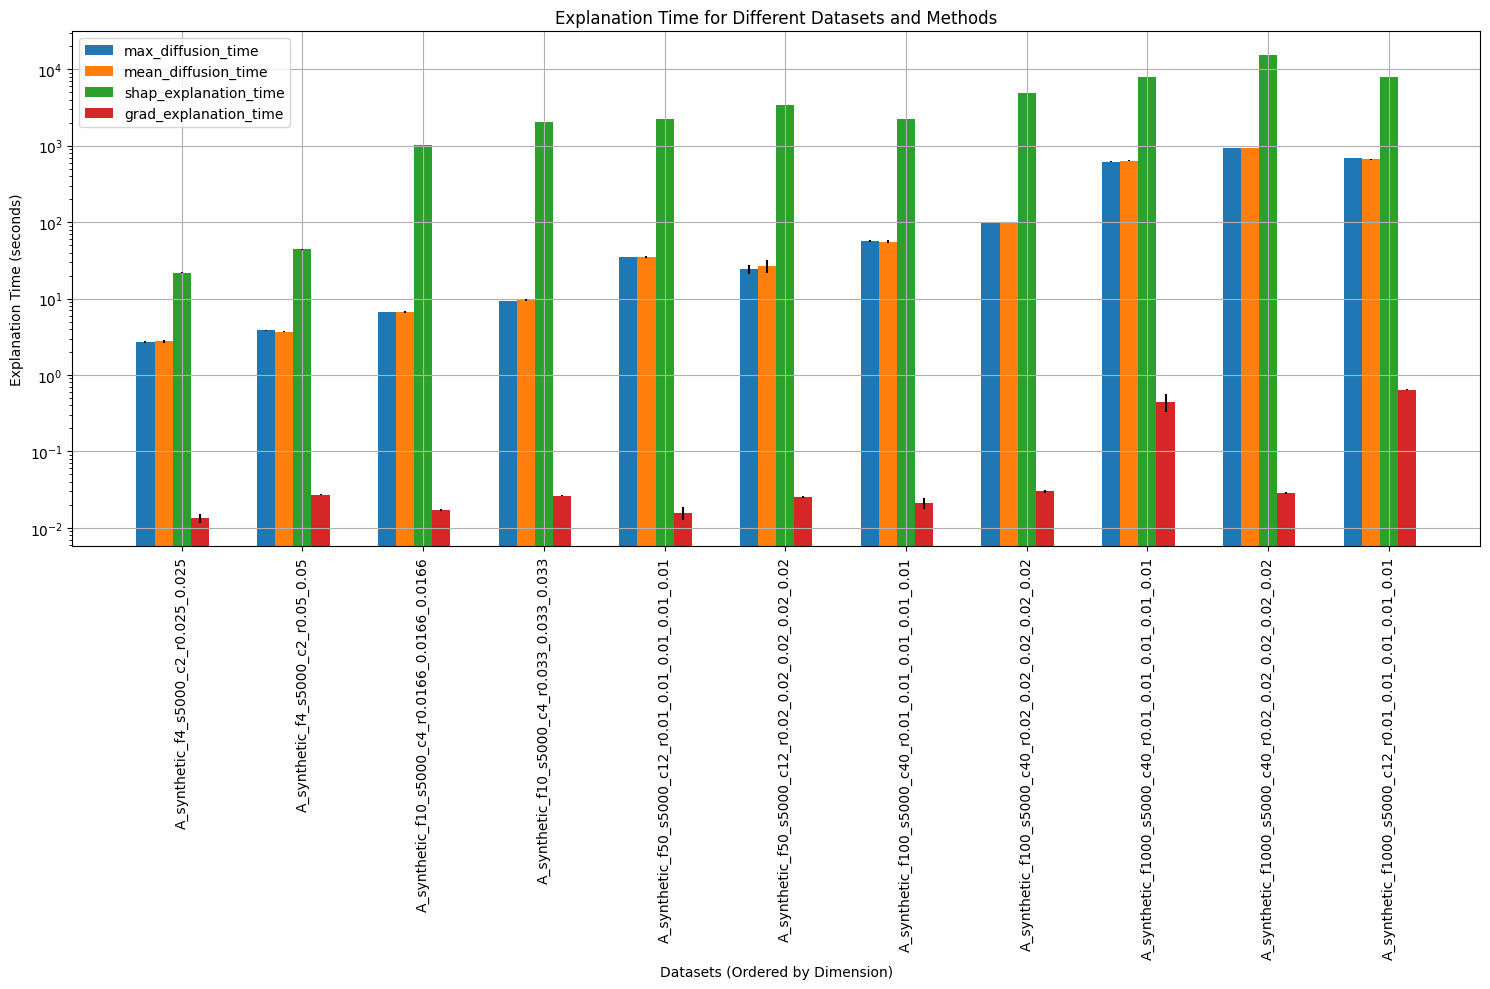

In [ ]:
# Sort datasets by dimension
mean_df = mean_df.sort_values('dimension')
std_df = std_df.sort_values('dimension')
datasets = mean_df['dataset_name'].unique()

# Extract unique methods
methods = ["max_diffusion_time", "mean_diffusion_time", "shap_explanation_time", "grad_explanation_time"]
num_datasets = len(datasets)
num_methods = len(methods)

r = np.arange(num_datasets)
bar_width = 0.15  # Adjust bar width to fit the methods

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot each method's average explanation time as a bar
for i, method in enumerate(methods):
    method_mean = mean_df.groupby("dataset_name")[method].mean().reindex(datasets)
    method_std = std_df.groupby("dataset_name")[method].std().reindex(datasets)
    ax.bar(r + i * bar_width, method_mean.values, width=bar_width, yerr=method_std.values, label=method)

# Add labels, title, and customize the x-axis
ax.set_xlabel('Datasets (Ordered by Dimension)')
ax.set_ylabel('Explanation Time (seconds)')
ax.set_title('Explanation Time for Different Datasets and Methods')
ax.set_xticks(r + bar_width * (num_methods ) / 2)
ax.set_xticklabels(datasets)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.yscale('log')
# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


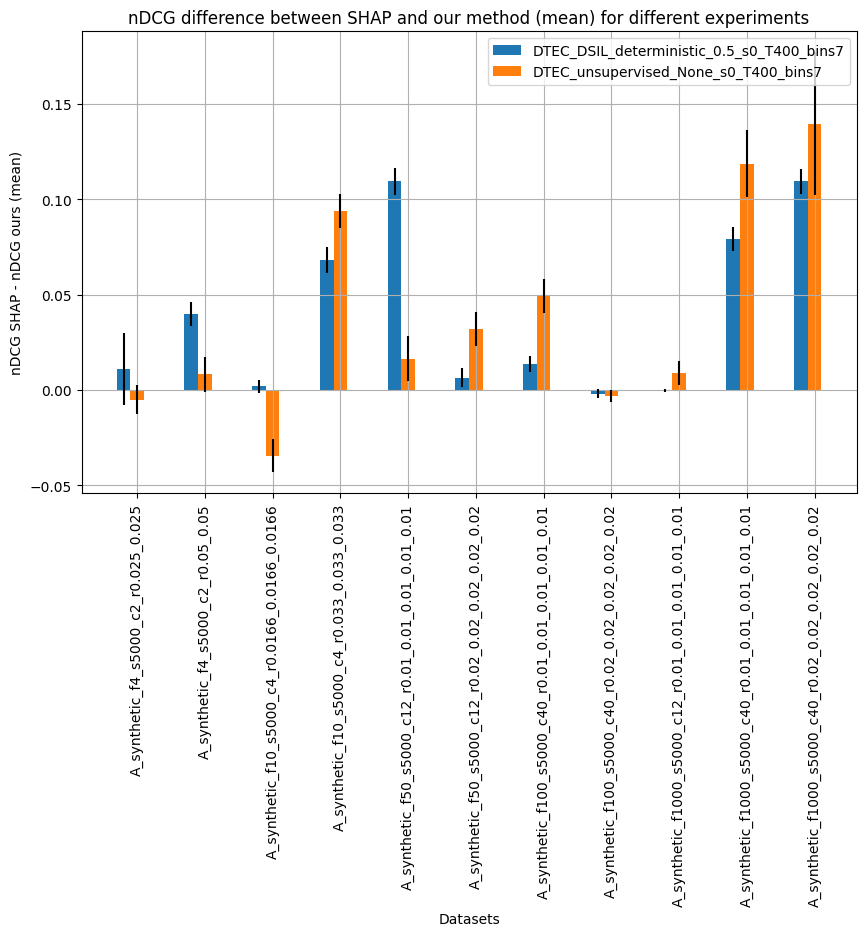

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="ndcg_diff_shap_mean", ylabel="nDCG SHAP - nDCG ours (mean)", title="nDCG difference between SHAP and our method (mean) for different experiments")

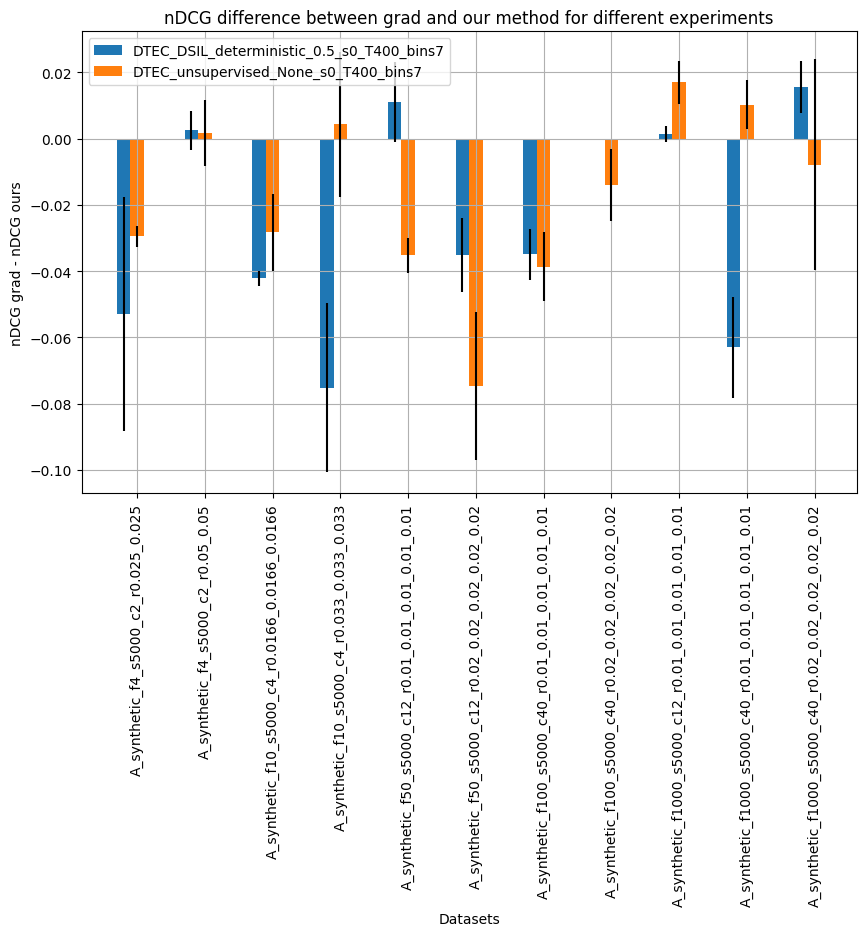

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="ndcg_diff_grad_mean", ylabel="nDCG grad - nDCG ours", title="nDCG difference between grad and our method for different experiments")

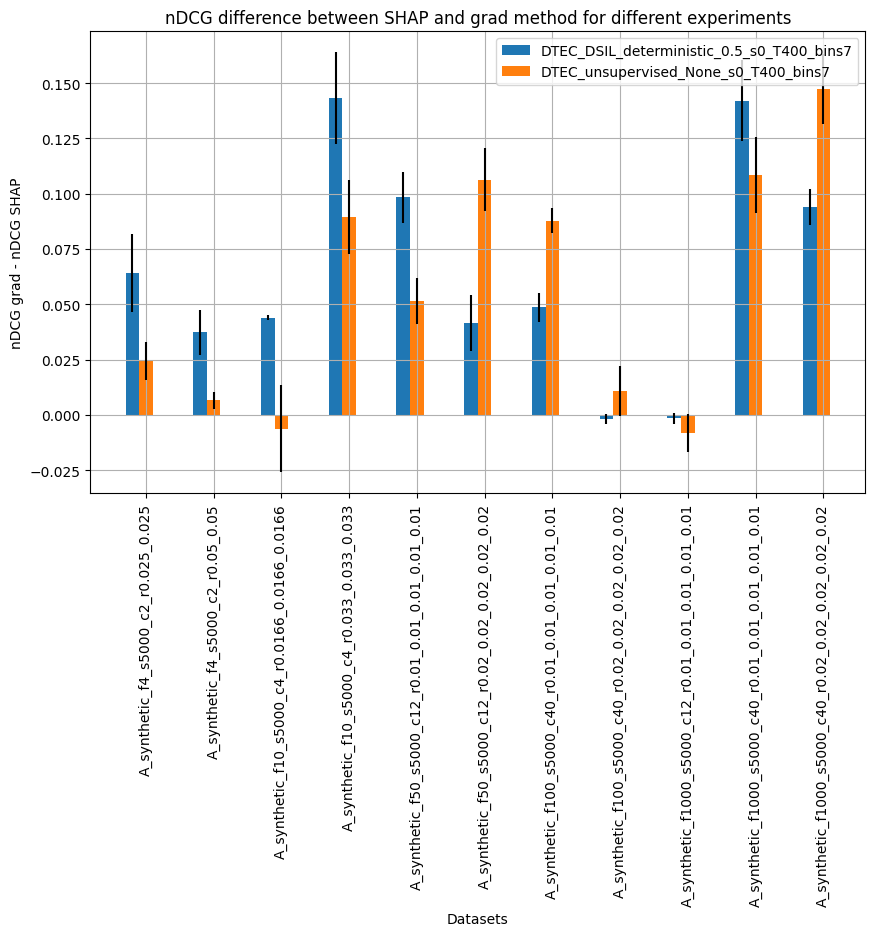

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="ndcg_diff_shap_grad", ylabel="nDCG grad - nDCG SHAP", title="nDCG difference between SHAP and grad method for different experiments")

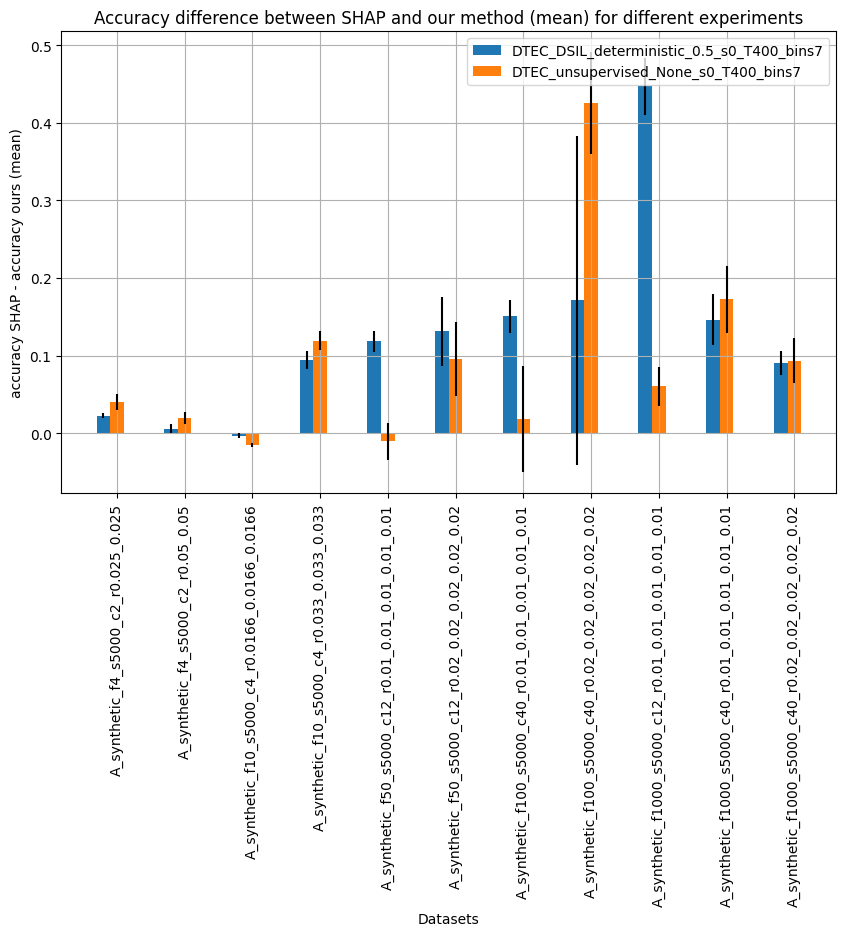

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="accuracy_diff_shap_mean", ylabel="accuracy SHAP - accuracy ours (mean)", title="Accuracy difference between SHAP and our method (mean) for different experiments")

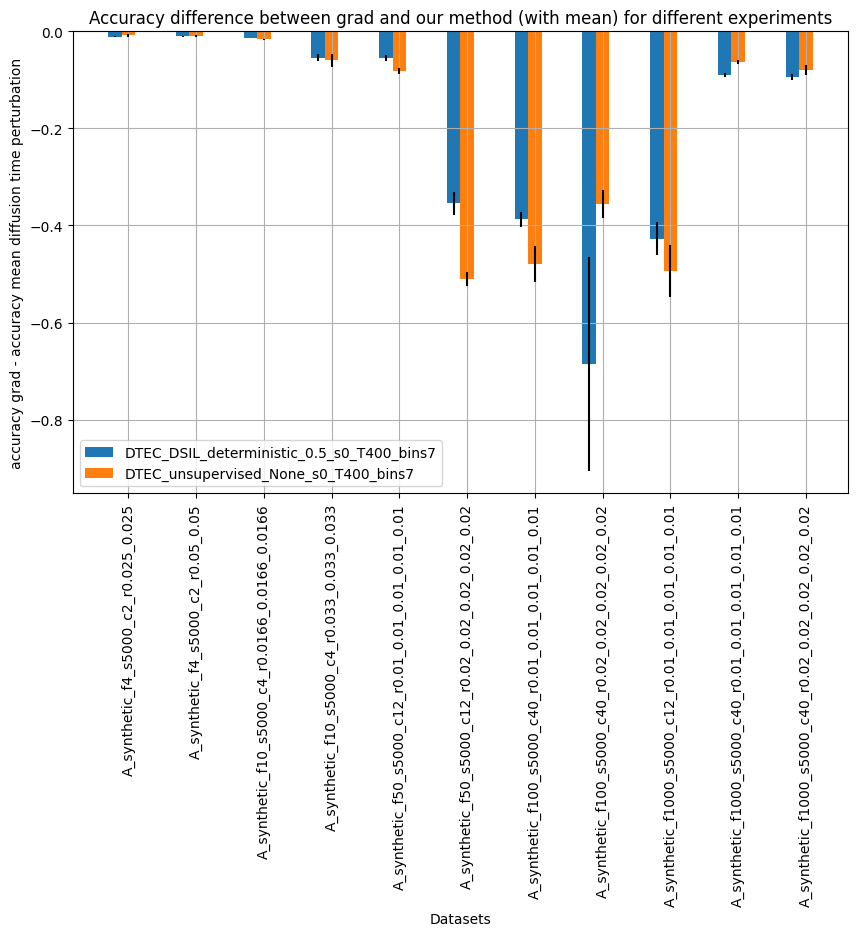

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="accuracy_diff_grad_mean", ylabel="accuracy grad - accuracy mean diffusion time perturbation", title="Accuracy difference between grad and our method (with mean) for different experiments")

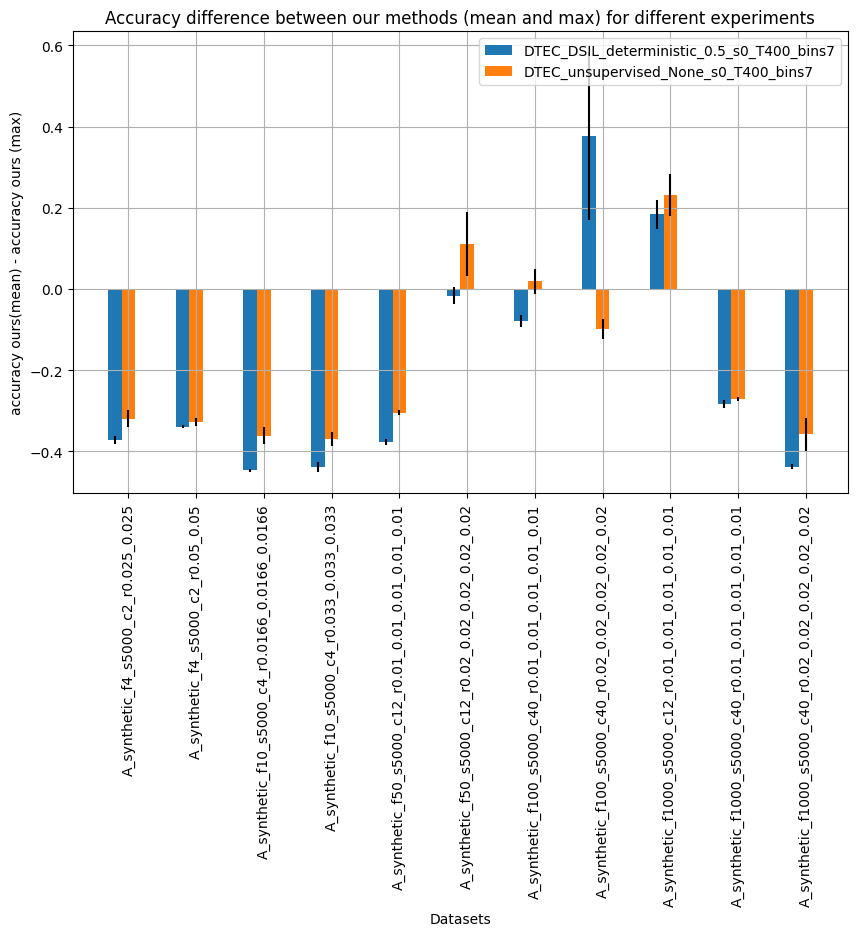

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="accuracy_diff_mean_max", ylabel="accuracy ours(mean) - accuracy ours (max)", title="Accuracy difference between our methods (mean and max) for different experiments")

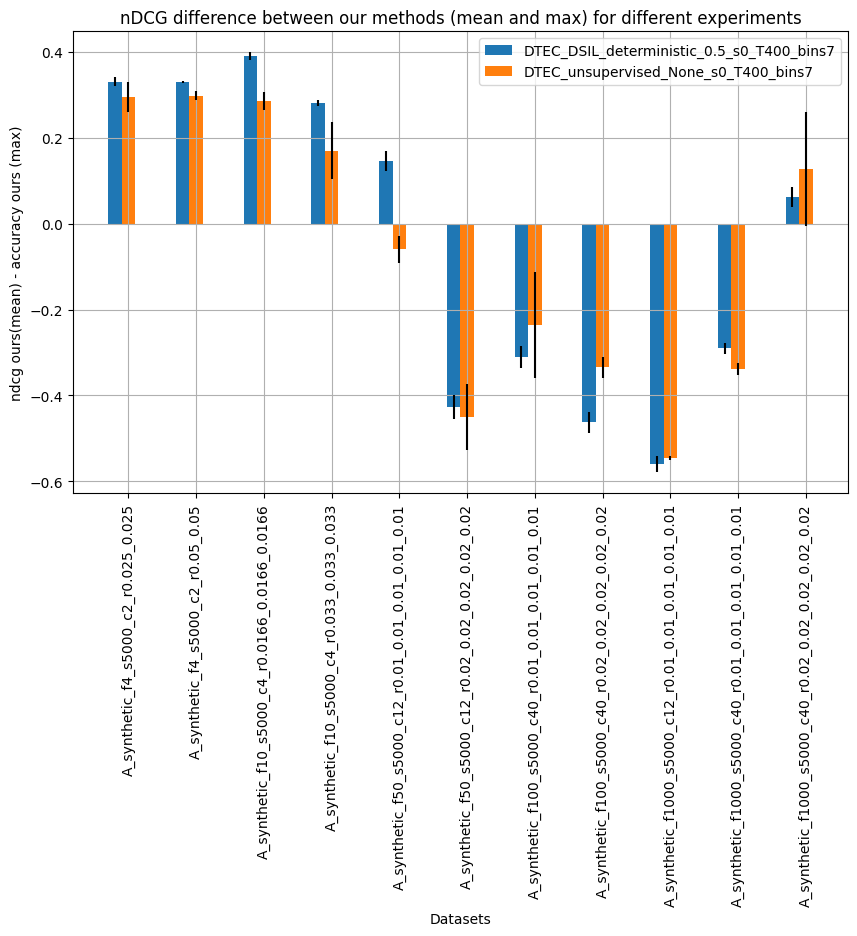

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="ndcg_diff_mean_max", ylabel="ndcg ours(mean) - accuracy ours (max)", title="nDCG difference between our methods (mean and max) for different experiments")

In [ ]:
# Step 1: Merge DataFrames on common columns
merged_df = pd.merge(mean_df, std_df, on=["dataset_name", "experiment", "dimension", "anomaly_ratio"], suffixes=('_mean', '_std'))
# Step 2: Combine mean and std into a single column with "mean(std)" format
merged_df["f1_score_str"] = merged_df.apply(
    lambda row: f"${row['f1_score_mean']:.2f}({row['f1_score_std']:.2f})$", axis=1
)

# Step 3: Drop the separate mean and std columns if needed
merged_df = merged_df.drop(columns=["f1_score_mean", "f1_score_std"])
print(merged_df.columns)
latex_table = dataframe_to_latex(
    merged_df[['experiment', 'dataset_name', "anomaly_ratio",'f1_score_str']],
    column_format="llc",  
    caption="Mean and Standard Deviation of F1 score for Different Experiments and Datasets",
    label="tab:mean_std",
    index=False
)
with open("latex_table.tex", "w") as f:
    f.write(latex_table)
latex_table.replace("\n", " ")

Index(['experiment', 'dataset_name', 'training_time_mean',
       'inference_time_mean', 'random_seed_mean', 'aucroc_mean',
       'grad_explanation_accuracy_mean', 'grad_explanation_time_mean',
       'grad_ndcg_mean', 'shap_explanation_accuracy_mean',
       'shap_feature_importance_ndcg_mean', 'shap_explanation_time_mean',
       'mean_diffusion_accuracy_mean', 'mean_diffusion_ndcg_mean',
       'mean_diffusion_time_mean', 'max_diffusion_accuracy_mean',
       'max_diffusion_ndcg_mean', 'max_diffusion_time_mean', 'dimension',
       'anomaly_ratio', 'ndcg_diff_shap_mean_mean', 'ndcg_diff_grad_mean_mean',
       'accuracy_diff_shap_mean_mean', 'accuracy_diff_grad_mean_mean',
       'ndcg_diff_shap_grad_mean', 'accuracy_diff_shap_grad_mean',
       'ndcg_diff_mean_max_mean', 'accuracy_diff_mean_max_mean',
       'training_time_std', 'inference_time_std', 'random_seed_std',
       'aucroc_std', 'grad_explanation_accuracy_std',
       'grad_explanation_time_std', 'grad_ndcg_std',
      

/home/elouan/code/code_repo/notebooks/utils_notebook.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace("_", " "))


'\\begin{table}[ht] \\centering \\caption{Mean and Standard Deviation of F1 score for Different Experiments and Datasets} \\label{tab:mean_std} \\begin{tabular}{llc} \\toprule experiment & dataset name & anomaly ratio & f1 score str \\\\ \\midrule \\bottomrule \\end{tabular} \\end{table}'

In [ ]:
# Define a function to extract and sum all ratios from the dataset name
def extract_ratios(dataset_name):
    # Use re.findall to capture all numerical ratios
    ratios = re.findall(r'r([0-9]*\.?[0-9]+)|_([0-9]*\.?[0-9]+)', dataset_name)
    # Flatten the list of tuples and filter out empty strings
    ratios = [float(r) for pair in ratios for r in pair if r]
    # Return the sum of the ratios
    return f"{sum(ratios) * 100:.2f}"
def rename_row(dataset_name):
    return "synthetic {} - {}".format(re.search(r"f(\d+)", dataset_name).group(1), extract_ratios(dataset_name))
# In dataset name, keep only the word "synthetic" and the number of feature which is after "f_"ArithmeticError
merged_df['dataset_name'] = merged_df['dataset_name'].apply(rename_row)


# Step 4: Pivot the DataFrame to have experiments as columns and datasets as rows
pivot_df = merged_df.pivot(index="dataset_name", columns="experiment", values="f1_score_str")

# If there is NaN in a column, remove the column
pivot_df = pivot_df.replace("nan", np.nan)
pivot_df = pivot_df.dropna(axis=1)
# Same if its nan in a string "nan"
# Step 5: Convert the pivoted DataFrame to LaTeX
latex_table = dataframe_to_latex(
    pivot_df,
    column_format="l" + "c" * (pivot_df.shape[1]),  # Adjust column format dynamically
    caption="F1 Score with Mean and Standard Deviation for Different Experiments and Datasets",
    label="tab:mean_std",
    index=True  # Include the row index (datasets)
)

# Save the LaTeX table to a file
with open("latex_table.tex", "w") as f:
    f.write(latex_table)

# Optional: Print the LaTeX table for verification
print(latex_table.replace("\n", " "))

\begin{table}[ht] \centering \caption{F1 Score with Mean and Standard Deviation for Different Experiments and Datasets} \label{tab:mean_std} \begin{tabular}{l} \toprule dataset_name \\ \midrule \bottomrule \end{tabular} \end{table}


/home/elouan/code/code_repo/notebooks/utils_notebook.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace("_", " "))


In [ ]:
# Turn nDCG and accuracy to string
merged_df["shape_nDCG_str"] = merged_df.apply(
    lambda row: f"${row['shap_feature_importance_ndcg_mean']:.2f}({row['shap_feature_importance_ndcg_std']:.2f})$", axis=1)
merged_df["shape_accuracy_str"] = merged_df.apply(
    lambda row: f"${row['shap_explanation_accuracy_mean']:.2f}({row['shap_explanation_accuracy_std']:.2f})$", axis=1
)
merged_df['local_nDCG_srt'] = merged_df.apply(
    lambda row: f"${row['feature_importance_ndcg_mean']:.2f}({row['feature_importance_ndcg_std']:.2f})$", axis=1
)
merged_df['local_accuracy_str'] = merged_df.apply(
    lambda row: f"${row['feature_importance_accuracy_mean']:.2f}({row['feature_importance_accuracy_std']:.2f})$", axis=1
)
merged_df['grad_nDCG_str'] = merged_df.apply(
    lambda row: f"${row['grad_feature_importance_ndcg_mean']:.2f}({row['grad_feature_importance_ndcg_std']:.2f})$", axis=1
)
merged_df['grad_accuracy_str'] = merged_df.apply(
    lambda row: f"${row['grad_explanation_accuracy_mean']:.2f}({row['grad_explanation_accuracy_std']:.2f})$", axis=1
)

ValueError: Cannot set a DataFrame with multiple columns to the single column local_nDCG_srt

In [ ]:
# Step 4: Pivot the DataFrame to have experiments as columns and datasets as rows
pivot_df = merged_df.pivot(index="dataset_name", columns="experiment", values=["shape_nDCG_str", "shape_accuracy_str", "local_nDCG_srt", "local_accuracy_str", "grad_nDCG_str", "grad_accuracy_str"])

# If there is NaN in a column, remove the column
pivot_df = pivot_df.replace("nan", np.nan)
pivot_df = pivot_df.dropna(axis=1)
pivot_df

dataset_name


In [ ]:
# Same if its nan in a string "nan"
# Step 5: Convert the pivoted DataFrame to LaTeX
latex_table = dataframe_to_latex(
    pivot_df,
    column_format="l" + "c" * (pivot_df.shape[1]),  # Adjust column format dynamically
    caption="F1 Score with Mean and Standard Deviation for Different Experiments and Datasets",
    label="tab:mean_std",
    index=True  # Include the row index (datasets)
)

# Save the LaTeX table to a file
with open("latex_table.tex", "w") as f:
    f.write(latex_table)

# Optional: Print the LaTeX table for verification
print(latex_table.replace("\n", " "))

AttributeError: Can only use .str accessor with Index, not MultiIndex

In [ ]:
merged_df.columns

In [ ]:
dataframe_to_latex(
    merged_df[['experiment', 'dataset_name', 'shap_feature_importance_ndcg_m', 'grad_feature_importance_ndcg', 'feature_importance_ndcg', "shap_explanation_accuracy_mean", "grad_explanation_accuracy_mean", "local_explanation_accuracy_mean"]],
    column_format="llccc",  
    caption="NDCG for Different Experiments and Datasets",
    label="tab:ndcg",
    index=False
)

In [ ]:
baseline_comp_dataset = pd.DataFrame()
temp_df = full_results_df
temp_df['dataset_name'] = temp_df['dataset_name'] + "_" + temp_df['dataset_version']
for dataset_name in full_results_df["dataset_name"].unique():
    dataset_results = full_results_df[full_results_df["dataset_name"] == dataset_name]
    baseline_results = dataset_results[dataset_results["training_method"] == "unsupervised"]
    dataset_results['f1_score_diff'] = dataset_results['f1_score'] - baseline_results['f1_score'].values[0]
    dataset_results['aucroc_diff'] = dataset_results['aucroc'] - baseline_results['aucroc'].values[0]
    dataset_results['aucroc_ratio'] = dataset_results['aucroc'] / baseline_results['aucroc'].values[0]
    dataset_results['f1_score_ratio'] = dataset_results['f1_score'] / baseline_results['f1_score'].values[0]
    dataset_results['feature_importance_ndcg_diff'] = dataset_results['feature_importance_ndcg'] - baseline_results['feature_importance_ndcg'].values[0]
    dataset_results['shap_feature_importance_ndcg_diff'] = dataset_results['shap_feature_importance_ndcg'] - baseline_results['shap_feature_importance_ndcg'].values[0]
    baseline_comp_dataset = pd.concat([baseline_comp_dataset, dataset_results]) 